# Gowdy Metric
##  Geoff Cope
##  University of Utah
##  December 22, 2021

This particular form of the Gowdy Metric is taken from: "Numerical Investigation of Cosmological Singularities" by Berger and Moncrief.  See Equation 3.1  We will derive the field equations later

https://arxiv.org/abs/gr-qc/9307032

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
tau,Lambda,z,x,y,dtau,dz,dx,dy = symbols( 'tau Lambda z x y dtau dz dx dy' ) 

In [4]:
variables = Matrix([tau,z,x,y])
variables

⎡τ⎤
⎢ ⎥
⎢z⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [6]:
differentials = Matrix([dtau,dz,dx,dy])
differentials 

⎡dtau⎤
⎢    ⎥
⎢ dz ⎥
⎢    ⎥
⎢ dx ⎥
⎢    ⎥
⎣ dy ⎦

In [7]:
P = Function('P')(tau,z)
P

In [8]:
Q = Function('Q')(tau,z)
Q

In [10]:
Lambda = Function('Lambda')(tau,z)
Lambda

In [16]:
lineElement = expand(exp((tau-Lambda)/2) * ( (-1)*exp(-2*tau)*dtau**2 + dz**2) + exp(-tau) * (( exp(P) * dx**2 + 2*exp(P)*Q*dx*dy) + ( (exp(P) * Q**2 + exp((-1)*P)) * dy**2 ) ))
lineElement

In [17]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  -3⋅τ   -Λ(τ, z)                                                                          
⎢  ─────  ─────────                                                                         
⎢    2        2                                                                             
⎢-ℯ     ⋅ℯ                 0                 0                              0               
⎢                                                                                           
⎢                     τ  -Λ(τ, z)                                                           
⎢                     ─  ─────────                                                          
⎢                     2      2                                                              
⎢        0           ℯ ⋅ℯ                    0                              0               
⎢                                                                                           
⎢                                        -τ  P(τ, z)                  

In [19]:
import sympy

In [20]:
m = sympy.Array(g)
m

⎡  -3⋅τ   -Λ(τ, z)                                                                          
⎢  ─────  ─────────                                                                         
⎢    2        2                                                                             
⎢-ℯ     ⋅ℯ                 0                 0                              0               
⎢                                                                                           
⎢                     τ  -Λ(τ, z)                                                           
⎢                     ─  ─────────                                                          
⎢                     2      2                                                              
⎢        0           ℯ ⋅ℯ                    0                              0               
⎢                                                                                           
⎢                                        -τ  P(τ, z)                  

In [21]:
from einsteinpy.symbolic import *

In [22]:
syms = sympy.symbols("tau z x y")
tau,z,x,y = syms

In [23]:
metric = MetricTensor(m,syms)

In [25]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡  ∂                     ∂                                                                 
⎢⎢  ──(Λ(τ, z))          -──(Λ(τ, z))                                                       
⎢⎢  ∂τ            3       ∂z                                                                
⎢⎢- ─────────── - ─      ─────────────                                        0             
⎢⎢       4        4            4                                                            
⎢⎢                                                                                          
⎢⎢   ∂               ⎛    ∂          ⎞  2⋅τ                                                 
⎢⎢  -──(Λ(τ, z))     ⎜1 - ──(Λ(τ, z))⎟⋅ℯ                                                    
⎢⎢   ∂z              ⎝    ∂τ         ⎠                                                      
⎢⎢  ─────────────    ──────────────────────                                   0             
⎢⎢        4                    4                                      

In [26]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                              2                                     2      
⎢                          2                  ∂                          2    -2⋅τ  ∂       
⎢   2⋅P(τ, z) ⎛∂          ⎞    ∂             ───(Λ(τ, z))   ⎛∂          ⎞    ℯ    ⋅───(Λ(τ, 
⎢  ℯ         ⋅⎜──(Q(τ, z))⎟    ──(Λ(τ, z))     2            ⎜──(P(τ, z))⎟            2      
⎢             ⎝∂τ         ⎠    ∂τ            ∂τ             ⎝∂τ         ⎠          ∂z       
⎢- ───────────────────────── + ─────────── + ──────────── - ────────────── - ───────────────
⎢              2                    2             4               2                  4      
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢            2⋅P(τ, z) ∂           ∂             ∂             ∂      

In [27]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢     ⎛                            2                              2                         
⎢     ⎜   2⋅τ ∂              2⋅τ  ∂              2⋅τ ⎛∂          ⎞     2⋅τ + 2⋅P(τ, z) ⎛∂   
⎢0.25⋅⎜- ℯ   ⋅──(Λ(τ, z)) - ℯ   ⋅───(Λ(τ, z)) + ℯ   ⋅⎜──(P(τ, z))⎟  + ℯ               ⋅⎜──(Q
⎢     ⎜       ∂τ                   2                 ⎝∂τ         ⎠                     ⎝∂τ  
⎢     ⎝                          ∂τ                                                         
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

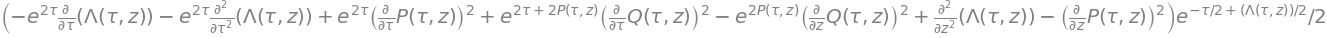

In [28]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [ ]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [ ]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()